# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# read the data
df = pd.read_csv('/kaggle/input/foodhubdataset/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [4]:
df.shape # print the dimensions of the DataFrame

(1898, 9)

#### Observations:The dataset has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [5]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:All the columns have 1898 observations indicating that there are no missing values in them. There are 5 numerical columns in the data and 4 object columns The pickup_dt column is being read as a 'object' data type The restaurant_name and cuisine_type , day of the week and rating are of object type while the rest of the columns are numerical in nature where all are integers except cost_of_the_order is float


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [6]:
# Write your code here
df.isnull().sum() #print the sum of null values for each column

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:As previously mentioned there are no missing values. also the following code validates the same result since as shown there are zero variables missing as given by result.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [7]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


Observation: Order ID and Customer ID are just identifiers for each order.
The cost of an order ranges from 4.47 to 35.41 dollars, with an average order costing around 16 dollars and a standard deviation of 7.5 dollars. The cost of 75% of the orders are below 23 dollars. This indicates that most of the customers prefer low-cost food compared to the expensive ones.
Food preparation time ranges from 20 to 35 minutes, with an average of around 27 minutes and a standard deviation of 4.6 minutes. The spread is not very high for the food preparation time.
Delivery time ranges from 15 to 33 minutes, with an average of around 24 minutes and a standard deviation of 5 minutes. The spread is not too high for delivery time either.

In [8]:
# Write your code here
df.describe().T #print the statitical summary of the data

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:On average cost of the order, food preparation time and delivery time are 17 monetary units , 27 minutes and 24 minutes respectively. cost of the order : 75% of te cost of orders is 22.30 while max. cost is around 35.41 with a little huge statndard deviation mounted to 7.5 monetary units. *the distribution of food preparation time and delivery time is fine . while 75% of food preparation time is about 27 minutes, the maximum record is 35 with deviation 4.6 minutes. As for delivery time 75% are within 28 minutes while the maximum value is 33 minutes with dispersion around 5


### **Question 5:** How many orders are not rated? [1 mark]

In [9]:
print(df[df['rating'] == 'Not given']['rating'].count())

736


In [10]:
# Write the code here
cat_cols = ['rating']  # Defines a list of categorical columns containing 'rating'
for column in cat_cols:  # For each column in the list
    print(df[column].value_counts())  # Prints the count of unique values in the 'rating' column
print("_"*50)  # Prints a line of underscores to visually separate the output



rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64
__________________________________________________


#### Observations:There are 736 unrated orders in the data.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Order ID**

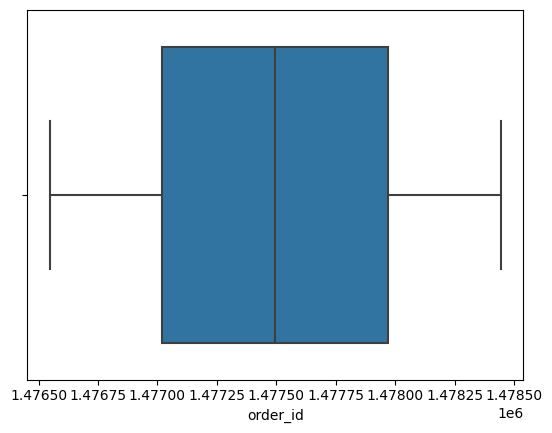

In [11]:
# Write the code here
sns.boxplot(data=df, x='order_id')  # Generates a boxplot using seaborn (sns) for the 'order_id' column in the DataFrame (df)
plt.show()  # Displays the generated boxplot

Observations:There are no outliers , the distribution of " order_id" is a normal distribution.


**Customer ID**

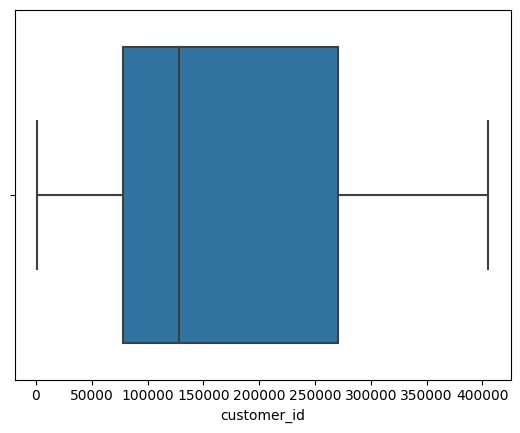

In [12]:
sns.boxplot(data=df, x='customer_id')  # Creates a boxplot using Seaborn (sns) for the 'customer_id' column in the DataFrame (df)
plt.show()  # Displays the generated boxplot

Observations: There are no outliers , however the distribution seems to be skewed to the right

**Restaurant name**

In [13]:
df['restaurant_name'].nunique()

178

Observations: There are 178 unique restaurants in the dataset.
Let's check the number of orders that get served by the restaurants.


In [14]:
df['restaurant_name'].value_counts()


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

Observations:The restaurant that has received maximum number of orders is Shake Shack

**Cuisine type**

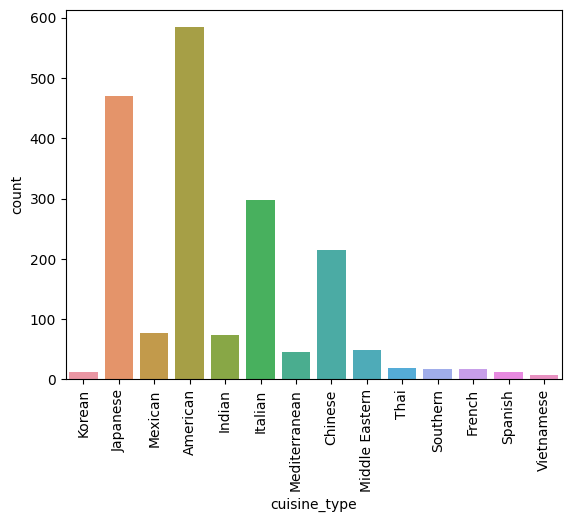

In [15]:
sns.countplot(data=df, x='cuisine_type')  # Creates a countplot using Seaborn (sns) for the 'cuisine_type' column in the DataFrame (df)
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees for better readability
plt.show()  # Displays the generated countplot

Observations:
There are 14 unique cuisines in the dataset.
The distribution of cuisine types show that cuisine types are not equally distributed. The most frequent cuisine type is American followed by Japanese and Italian. Vietnamese appears to be the least popular of all the cuisines.


**Cost of the order**

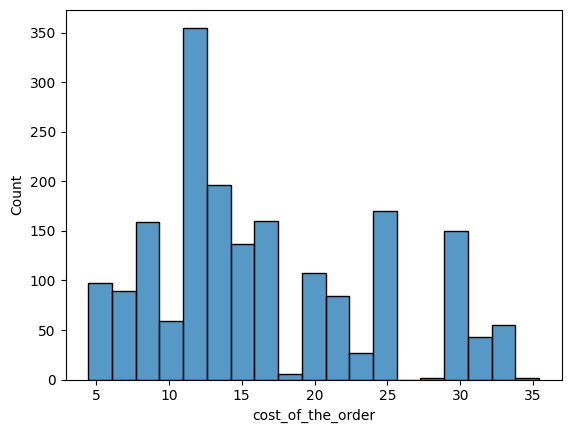

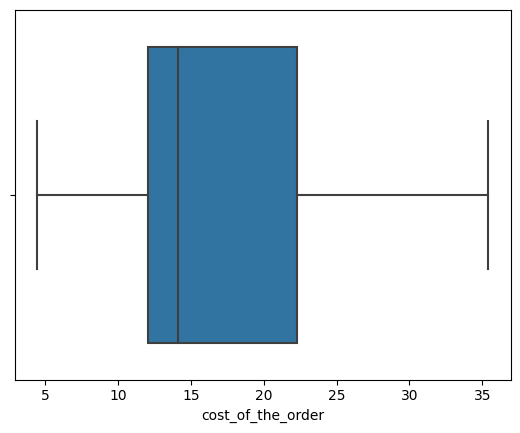

In [16]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()
sns.boxplot(data=df, x='cost_of_the_order')  # Generates a boxplot using Seaborn (sns) for the 'cost_of_the_order' column in the DataFrame (df)
plt.show()

Observations:There are no outliers, however it is clear from the box plot that data is skewed to the right

**Day of the week**

In [17]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

<Axes: xlabel='day_of_the_week', ylabel='count'>

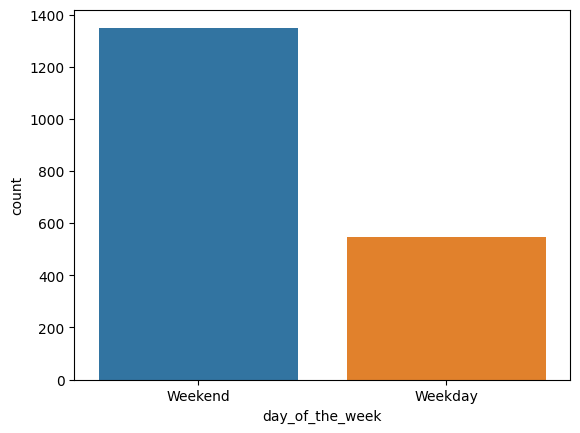

In [18]:
sns.countplot(data = df, x = 'day_of_the_week')

Observations:The 'day_of_the_week' columns consists of 2 unique values - Weekday and Weekend
The distribution shows that number of order placed on weekends is approximately double the number of orders placed on weekdays.

**Rating**

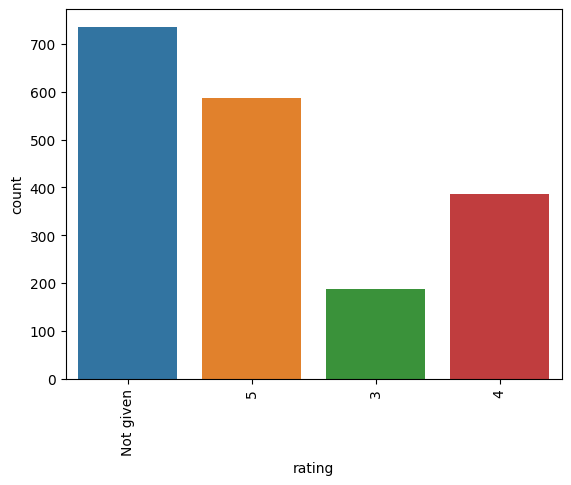

In [19]:
sns.countplot(data=df, x='rating')  # Creates a countplot using Seaborn (sns) for the 'rating' column in the DataFrame (df)
plt.xticks(rotation=90)  # Rotates the x-axis labels by 90 degrees for better readability
plt.show()  # Displays the generated countplot


Observations : It seems that most of the customers did not give rating where it amounts to more than 700, followed by almost 600 customers did value the service to me 5 and about 400 customers give rank 4 while only 200 customers give a rank of 3.
The distribution of 'rating' shows that the most frequent rating category is 'not given', followed by a rating of 5.
Only around 200 orders have been rated 3.

**Food Preparation time**

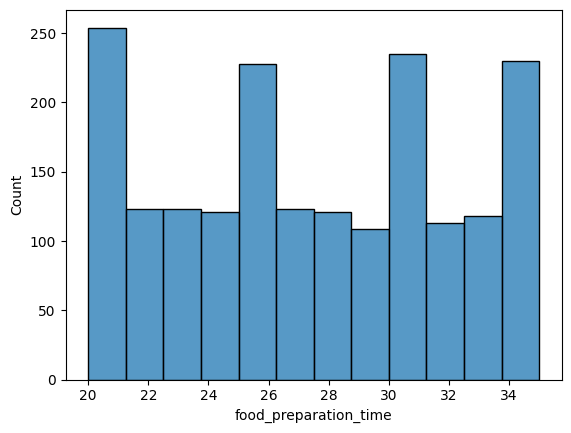

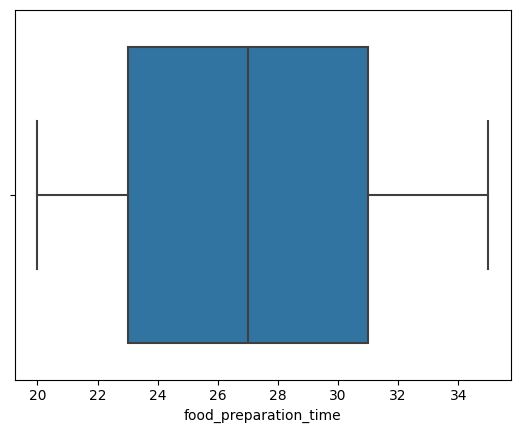

In [20]:
sns.histplot(data=df,x='food_preparation_time')
plt.show()
sns.boxplot(data=df,x='food_preparation_time')
plt.show()

Observations:The average food preparation time is almost equal to the median food preparation time indicating that the distribution is nearly symmetrical.
The food preparation time is pretty evenly distributed between 20 and 35 minutes.
There are no outliers in this column.


**Delivery time**

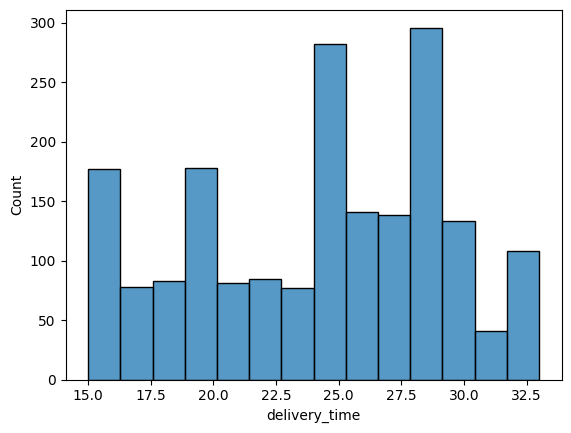

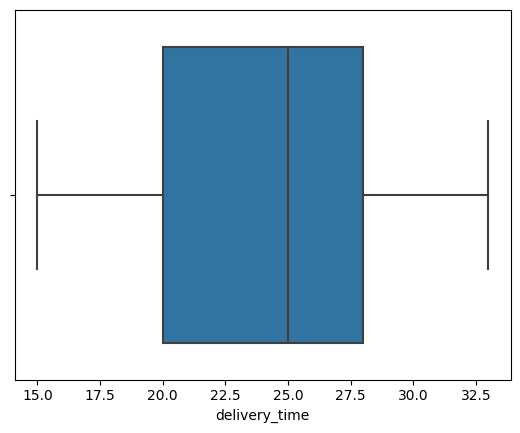

In [21]:
sns.histplot(data=df,x='delivery_time')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Observations:The average delivery time is a bit smaller than the median delivery time indicating that the distribution is a bit left-skewed.
Comparatively more number of orders have delivery time between 24 and 30 minutes.
There are no outliers in this column.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [22]:
# Write the code here
df['restaurant_name'].value_counts()[:5]

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:FTop 5 popular restaurants that have received the highest number of orders 'Shake Shack', 'The Meatball Shop', 'Blue Ribbon Sushi', 'Blue Ribbon Fried Chicken' and 'Parm'.



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [23]:
# Write the code here
df['day_of_the_week'].unique()  # Retrieves an array containing the unique values present in the 'day_of_the_week' column of the DataFrame (df)


array(['Weekend', 'Weekday'], dtype=object)

In [24]:
df['cuisine_type'].unique()  # Fetches an array containing the unique values found in the 'cuisine_type' column of the DataFrame (df)
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts()

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: count, dtype: int64

<Axes: xlabel='cuisine_type', ylabel='count'>

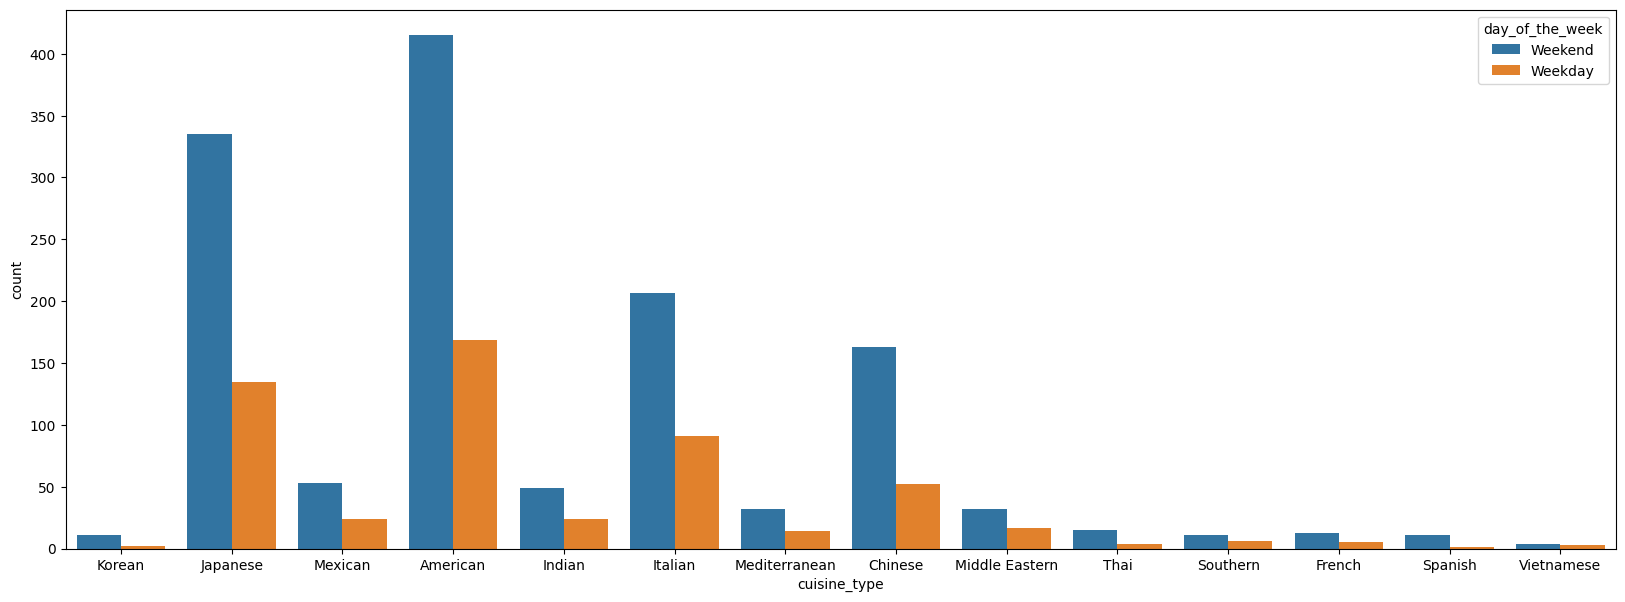

In [25]:
plt.figure(figsize=(20, 7))  # Sets the size of the figure for visualization to 20 units in width and 7 units in height

sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')  # Creates a countplot using Seaborn (sns) to display the count of 'cuisine_type' categories, segmented by 'day_of_the_week'



#### Observations:The most popular cuisine type on the week end is American.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [26]:
# Write the code here
total_observations = df['cost_of_the_order'].count() # Counts the total number of observations or entries in the 'cost_of_the_order' column of the DataFrame (df)
orders_above20 = df['cost_of_the_order'][df['cost_of_the_order']> 20].count() # Counts the number of entries in 'cost_of_the_order' column where the value is greater than 20
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order'] > 20]
# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])
# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')
percentage_above20 = round((orders_above20/total_observations)*100,2) # Calculates the percentage of orders with cost above 20
percentage_above20

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


29.24

#### Observations:there are about 555 order whose prices are above 20 which represents 555out of 1898 of total orders which represents about 29%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [27]:
# Write the code here
df.describe().T #statistical summary of the DataFrame



,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [28]:
# get the mean delivery time
print('The mean delivery time for this dataset is', round(df['delivery_time'].mean(), 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


#### Observations:mean delivery time is approximately about 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [29]:
# Write the code here
df['customer_id'].unique()

array([337525, 358141,  66393, ...,  97838, 292602, 397537])

In [30]:
df['customer_id'].nunique()

1200

In [31]:
df['customer_id'].value_counts(normalize=True)

customer_id
52832     0.006849
47440     0.005269
83287     0.004742
250494    0.004215
259341    0.003688
            ...   
385426    0.000527
254913    0.000527
289597    0.000527
74412     0.000527
397537    0.000527
Name: proportion, Length: 1200, dtype: float64

In [32]:
df['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:The top 3 most frequent customers are customers no.52832 who ordered 0.6% (13 times)of total orders followed by customer no.47440 who ordered 0.5% of total orders , while come at 3rd place customer no. 83287 who ordered 0.4742% of orders.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


**Cuisine vs Cost of the order**

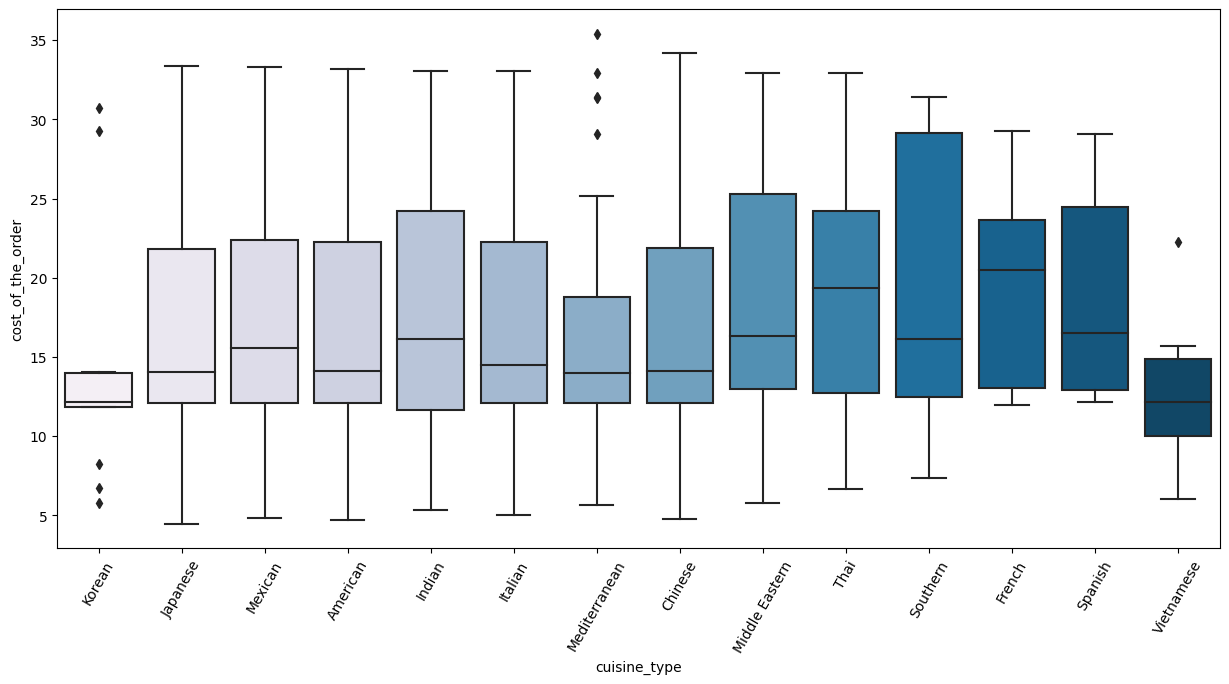

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

Observations: Vietnamese and Korean cuisines cost less compared to other cuisines.
The boxplots for Italian, American, Chinese, Japanese cuisines are quite similar. This indicates that the quartile costs for these cuisines are quite similar.
Outliers are present for the cost of Korean, Mediterranean and Vietnamese cuisines.
French and Spanish cuisines are costlier compared to other cuisines.

**Cuisine vs Food Preparation time**

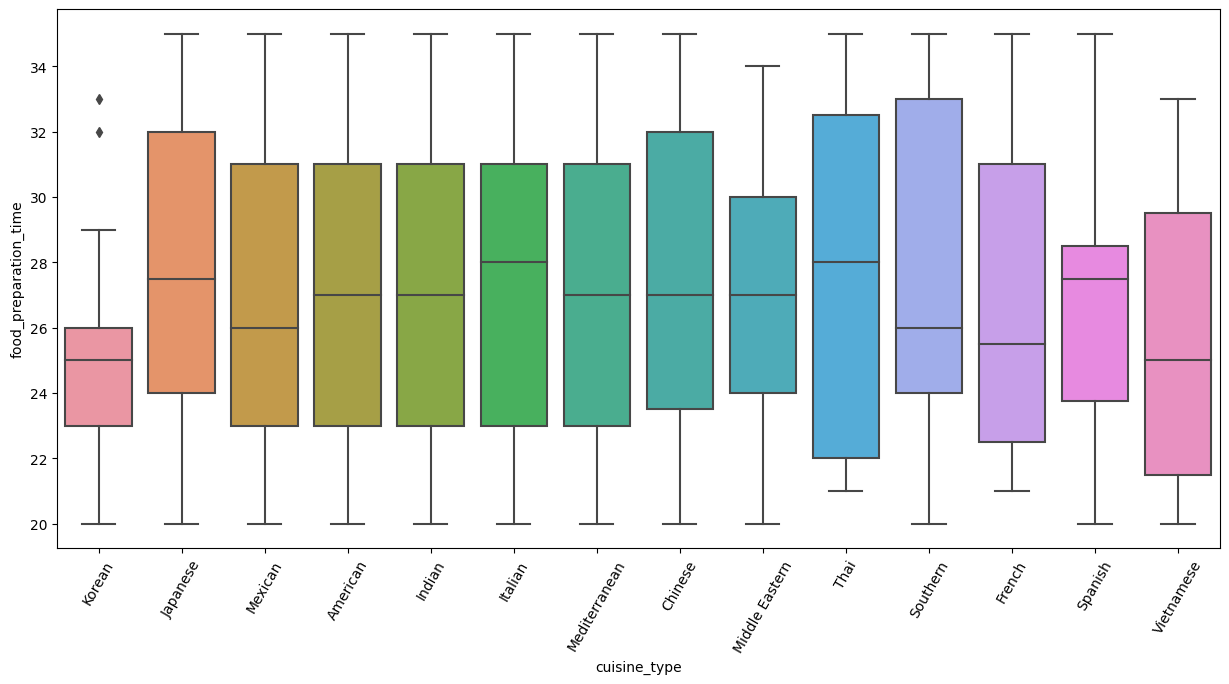

In [34]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df)
plt.xticks(rotation = 60)
plt.show()

Observations:Food preparation time is very consistent for most of the cuisines.
The median food preparation time lies between 24 and 30 minutes for all the cuisines. Outliers are present for the food preparation time of Korean cuisine.
Korean cuisine takes less time compared to the other cuisines.


**Day of the Week vs Delivery time**

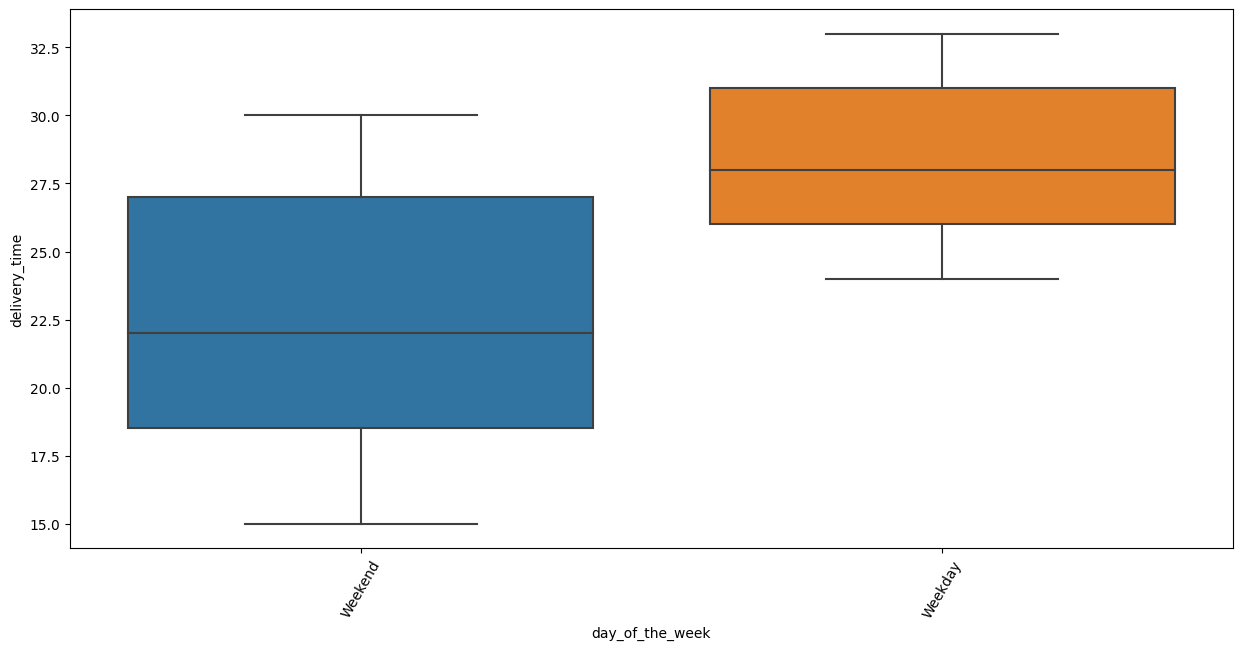

In [35]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df)
plt.xticks(rotation = 60)
plt.show()

Observations:The delivery time for all the orders over the weekends is less compared to weekdays. This could be due to the dip in traffic over the weekends.

**Revenue generated by the restaurants**


In [36]:
plt.figure(figsize = (15, 7))
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Rubirosa                          660.45
Sushi of Gari 46                  640.87
Nobu Next Door                    623.67
Five Guys Burgers and Fries       506.47
Name: cost_of_the_order, dtype: float64

<Figure size 1500x700 with 0 Axes>

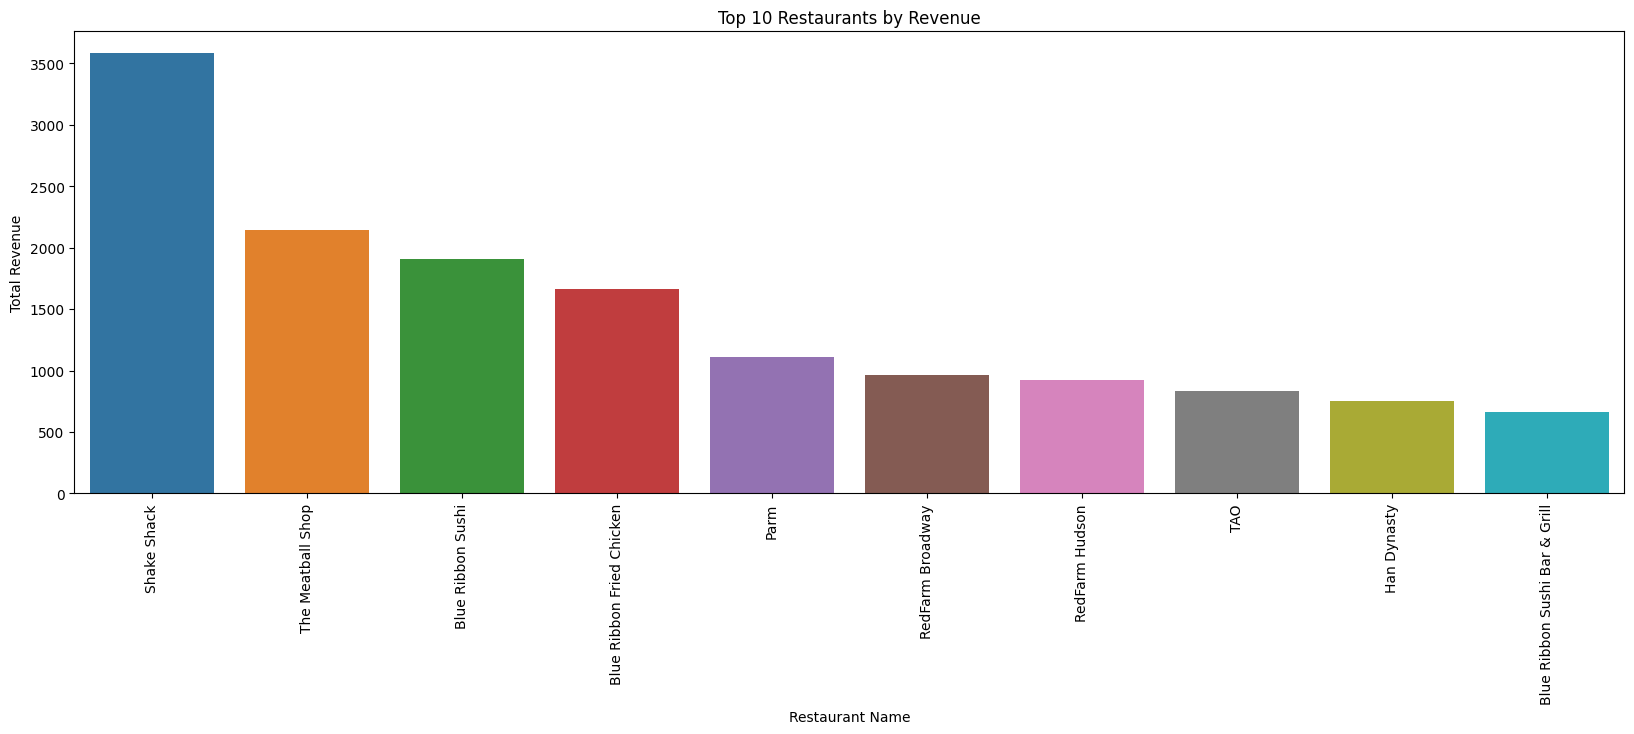

In [37]:
#plt.figure(figsize=(20,6))
#sns.catplot(data=top10_cost,x= 'restaurant_name', y='cost_of_the_order', kind=
#'bar')
#plt.xticks(rotation=90);
top10_cost = df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending=False).head(10)

# Plot the top 10 restaurants based on revenue generated
plt.figure(figsize=(20,6))
sns.barplot(x=top10_cost.index, y=top10_cost.values)
plt.xticks(rotation=90)
plt.xlabel('Restaurant Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Restaurants by Revenue')
plt.show()

Observations: From the bargragh it is obvious that restaurant shake shack is the most costly restaurant followed by the meatball shop then blue ribbon susshi and at the 1oth place comes blue ribbon sushi bar

In [38]:
top10_type = df.groupby('cuisine_type').sum(numeric_only=True)[['cost_of_the_order']].sort_values('cost_of_the_order', ascending=False).reset_index().head(10)
top10_type

,cuisine_type,cost_of_the_order
0,American,9530.78
1,Japanese,7663.13
2,Italian,4892.77
3,Chinese,3505.62
4,Mexican,1303.85
5,Indian,1235.14
6,Middle Eastern,922.21
7,Mediterranean,711.84
8,Thai,364.95
9,French,356.29


<Figure size 2000x600 with 0 Axes>

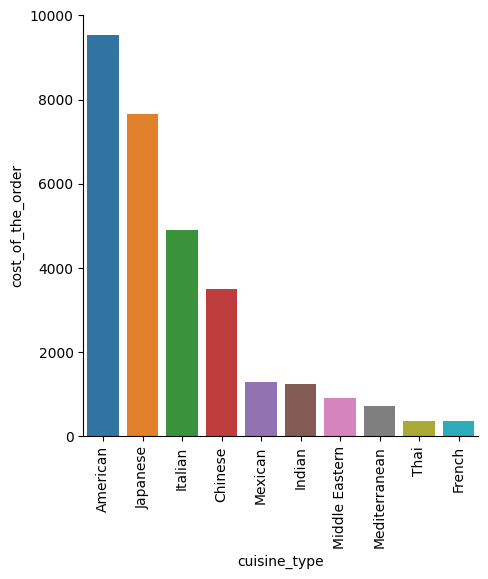

In [39]:
plt.figure(figsize=(20,6))
sns.catplot(data=top10_type,x= 'cuisine_type', y='cost_of_the_order',kind='bar')
plt.xticks(rotation=90);

Observations: The American cuisine is the most expensive type followed by Japanese the Italian and then comes at 1oth place the french

**Rating vs Delivery time**

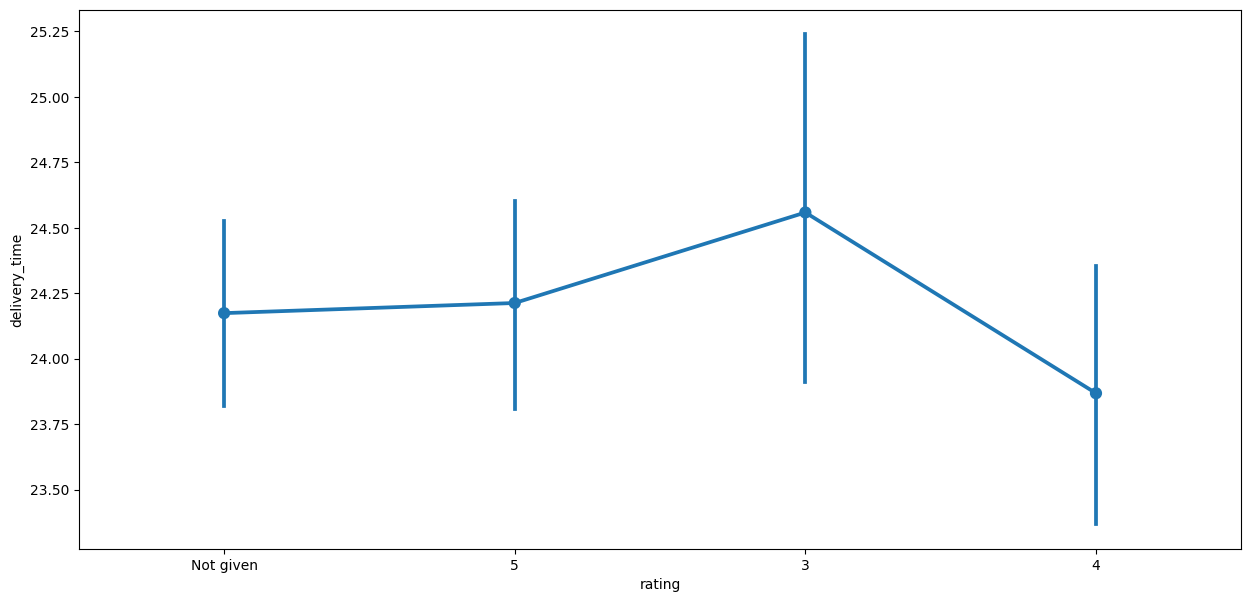

In [40]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()


Observations : It is possible that delivery time plays a role in the low-rating of the orders.


**Rating vs Food preparation time**

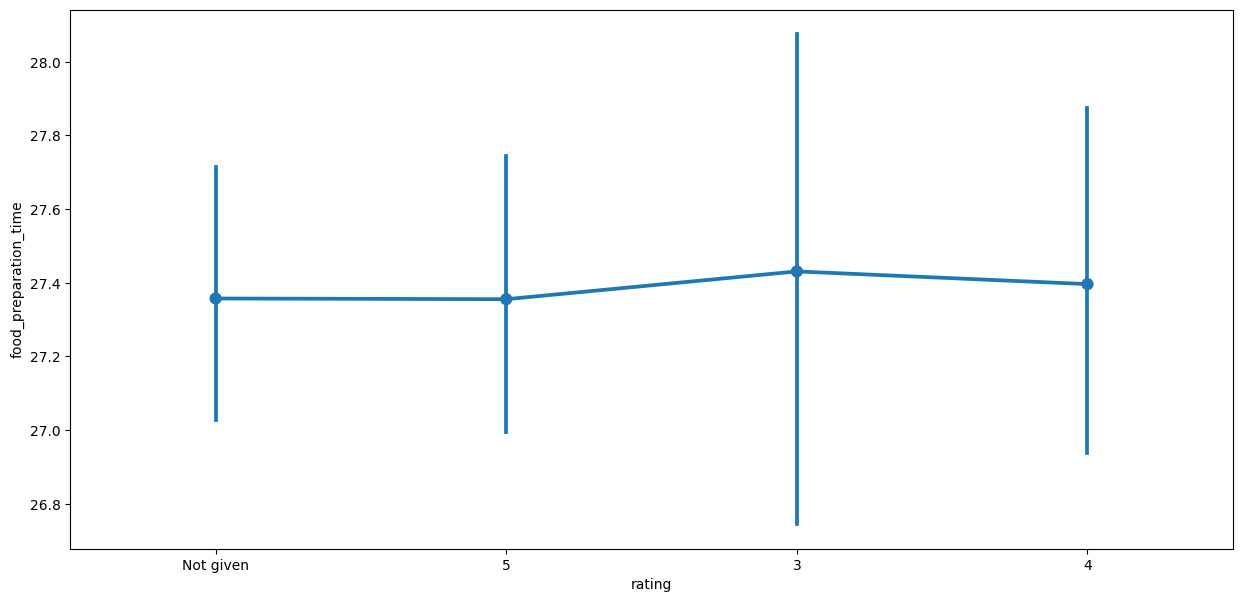

In [41]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

Observations:It seems that food preparation time does not play a role in the low-rating of the orders.

**Rating vs Cost of the order**

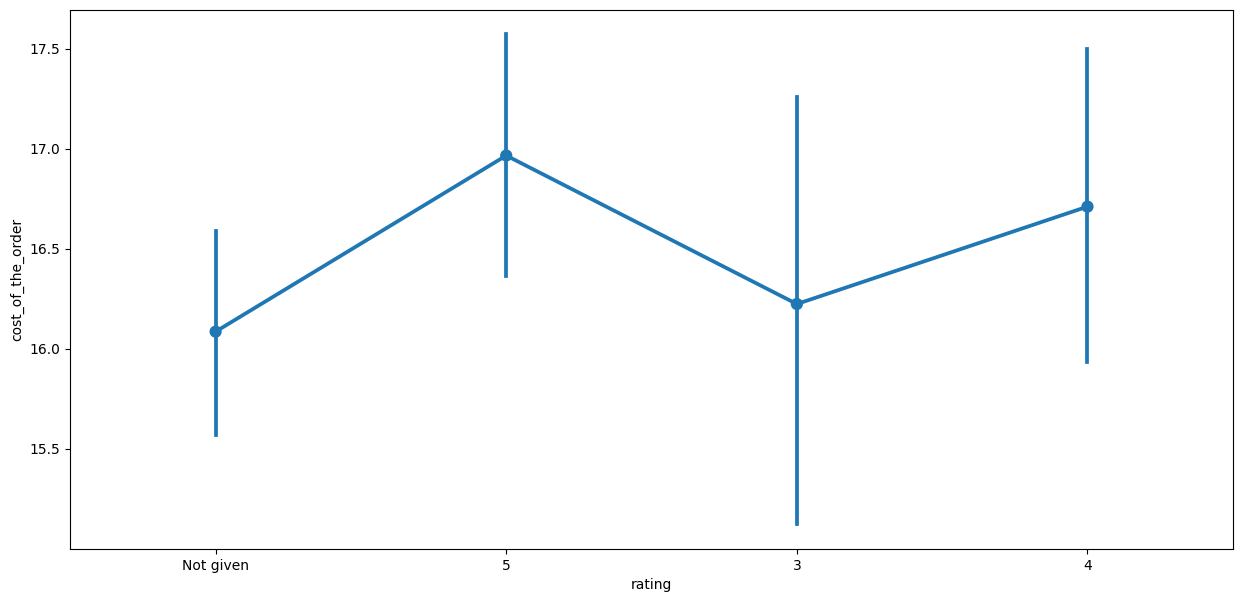

In [42]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

Observations:It seems that high-cost orders have been rated well and low-cost orders have not been rated.

**Correlation among variables**

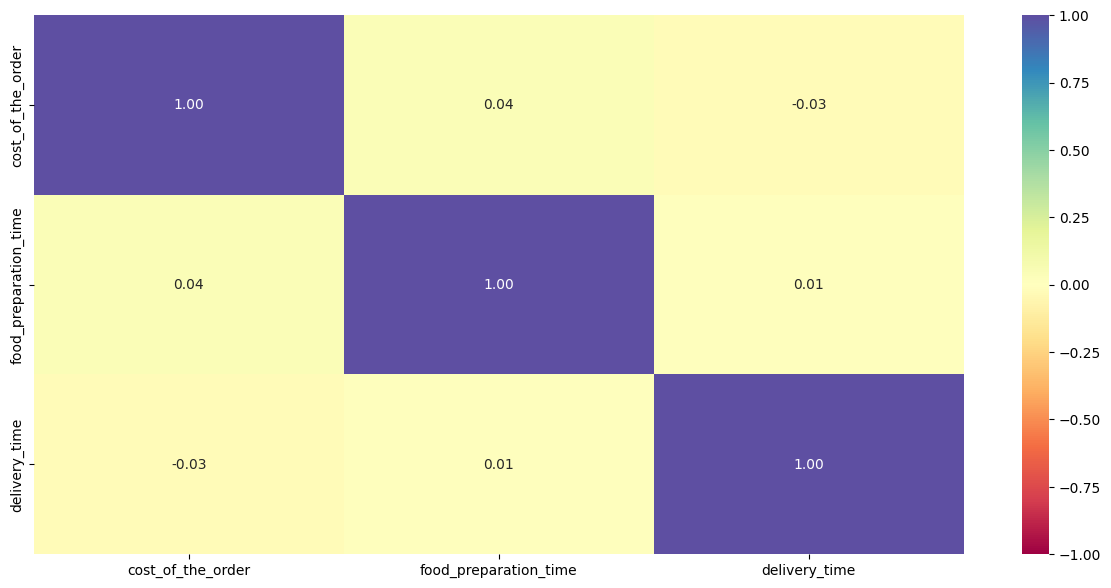

In [43]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral" )
plt.show()

Observations:There is no correlation between cost of the order, delivery time and food preparation time.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [44]:
# Write the code here

d2 = df[['restaurant_name', 'rating']][df['rating'] != 0].groupby('restaurant_name').mean(numeric_only=True) > 4
d3 = df[['restaurant_name', 'rating']][df['rating'] != 0].groupby('restaurant_name').count() > 50

print(d2)
print(d3)


Empty DataFrame
Columns: []
Index: ['wichcraft, 12 Chairs, 5 Napkin Burger, 67 Burger, Alidoro, Amma, Amy Ruth's, Anjappar Chettinad, Asuka Sushi, Aurora, Balade, Balthazar Boulangerie, Barbounia, Bareburger, Benihana, Bhatti Indian Grill, Big Daddy's, Big Wong Restaurant _¤¾Ñ¼, Bistango, Blue Ribbon Brooklyn, Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Blue Ribbon Sushi Bar & Grill, Blue Ribbon Sushi Izakaya, Boqueria, Bubby's , Bukhara Grill, Burger Joint, Byblos Restaurant, Cafe Habana, Cafe Mogador, Cafe de La Esquina, Cafeteria, CafÌ© China, Carmine's, Chipotle Mexican Grill $1.99 Delivery, Cho Dang Gol, Chola Eclectic Indian Cuisine, Chote Nawab, Cipriani Le Specialita, Coppola's East, Crema Restaurante, Delicatessen, DespaÌ±a, Dickson's Farmstand Meats, Dig Inn Seasonal Market, Dirty Bird To Go (archived), Dirty Bird to Go, Don's Bogam BBQ & Wine Bar, Donburi-ya, Dos Caminos, Dos Caminos Soho, DuMont Burger, El Parador Cafe, Empanada Mama (closed), Emporio, Five Guys Burgers 

In [45]:
# filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()
# convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')
# create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [46]:
# get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']
# filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()
# find the mean rating of the restaurants
df_mean_4.groupby(df_mean_4['restaurant_name'])['rating'].mean().sort_values(ascending =False).reset_index()

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations:The restaurants fulfilling the criteria to get the promotional offer are: Chicken', 'Shake Shack' and 'Blue Ribbon Sushi'


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [47]:
# Write the code here
revenue = 0  # Initializes the variable to hold the total revenue
income = 0  # Initializes the variable to hold the income from individual orders
cost = pd.Series(df['cost_of_the_order'])  # Creates a Pandas Series containing the 'cost_of_the_order' column from the DataFrame

# Iterates through each item in the 'cost' Series using its length as the range
for i in range(len(cost)):
    # Checks conditions for cost ranges and calculates income based on percentages
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i] * 0.15  # Calculates income at 15% for orders with costs between 5 and 20
    elif (cost[i] > 20):
        income = cost[i] * 0.25  # Calculates income at 25% for orders with costs above 20
    else:
        income = 0  # Sets income to 0 for orders not meeting the specified criteria

    revenue = revenue + income  # Accumulates the income to calculate the total revenue

# Prints the total revenue calculated from the loop
print('Net revenue is: ', revenue)




Net revenue is:  6166.302999999994


#### Observations:Total revenue generated for all orders is 6166.31


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [48]:
# Write the code here
df['total_prep_time'] = df['food_preparation_time']+df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_prep_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [49]:
total_data = df['total_prep_time'].count() # Counts the total number of entries in the 'total_prep_time' column
ordertime_above60 = df['total_prep_time'][df['total_prep_time']> 60].count() # Counts the number of entries where 'total_prep_time' is greater than 60

percent_above60 = round((ordertime_above60/total_data)*100,2) # Calculates the percentage of orders with preparation time above 60
percent_above60

10.54

#### Observations:10.54% of orders take more than 60 minutes


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [50]:
# Write the code here
average_time = df.groupby('day_of_the_week')[['delivery_time']].agg(['mean','sum','count','std'])
average_time

delivery_time                       
                         mean    sum count       std
day_of_the_week                                     
Weekday             28.340037  15502   547  2.891428
Weekend             22.470022  30357  1351  4.628938

In [51]:
print('The mean delivery time on weekdays is around',round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),'minutes')
print('The mean delivery time on weekends is around',round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekends is around 22 minutes


#### Observations:The mean delivery time on weekdays is around 28 minutes whereas the mean delivery time on weekends is around 22 minutes.
This could be due to the dip of traffic volume in the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
It appears that a significant number of customers, approximately 736 out of a total of 1898, have not provided feedback through the rating form. Addressing this is crucial as feedback holds substantial importance for enhancing the restaurant's quality.

Certain cuisines such as American, Japanese, Italian, and Chinese are notably preferred by customers over other restaurant types.

There's a distinct inclination among customers to order from specific restaurants, with Shake Shack leading, followed by Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and then Parm.

The costs of different cuisines vary considerably, ranging from a maximum of 35.41 to a minimum of 4.47. Additionally, there's a higher number of orders during weekends compared to weekdays.


### Recommendations:

To incentivize customers to complete the rating questionnaire, consider offering coupon discounts or special deals.

Consider providing special discounts for the most popular cuisines to differentiate them, given their significantly higher order volume. Lowering the cost for orders from these restaurants could be seen as a privilege.

Food Hub could enhance its delivery services by offering special perks such as discounted pricing and prioritized delivery for certain restaurants compared to others.

Food Hub should implement varying charges for restaurants based on the differences in their menu prices.

It's advisable for Food Hub to increase the number of delivery captains during weekends or extend their working hours or shifts compared to weekdays to meet the higher demand for deliveries.


---